In [1]:
import matplotlib.pyplot as pylot
import pandas as pd
import numpy as np
import pylab as pylab
%matplotlib inline

# %matplotlib inline komutu olmadan, grafik bir pencerede açılır ve Jupyter hücresi içinde görüntülenmez. Ancak, %matplotlib inline komutunu ekleyerek grafik, hücrenin içinde görüntülenir.

In [2]:
# !wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

!curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Skills

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
curl: (35) schannel: next InitializeSecurityContext failed: Unknown error (0x80092012) - �ptal i�levi sertifikan�n iptal edilip edilmedi�ini denetleyemedi.


In [3]:
df=pd.read_csv("data/FuelConsumption.csv")

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
cdf=df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS' ]]

In [7]:
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


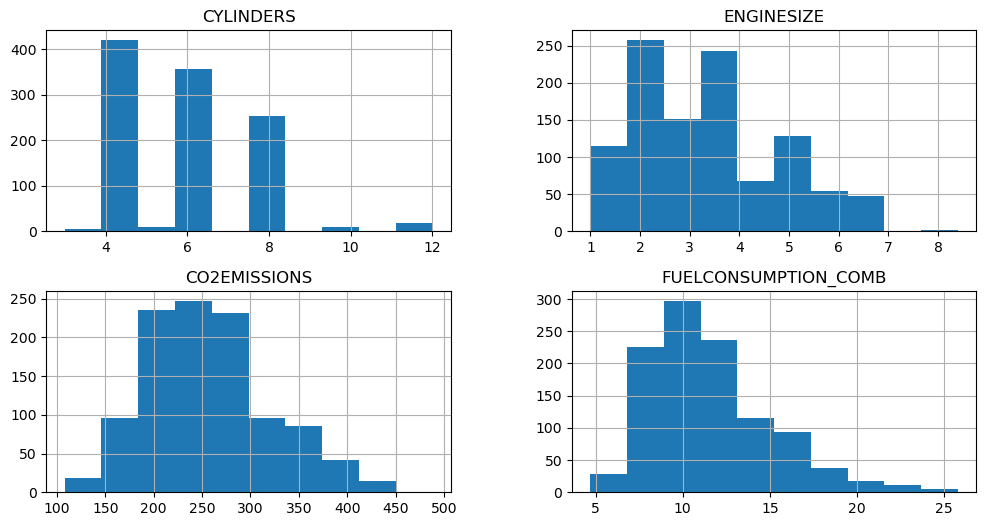

In [8]:
pylot.rcParams['figure.figsize'] = (12,6)

viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
pylot.show()

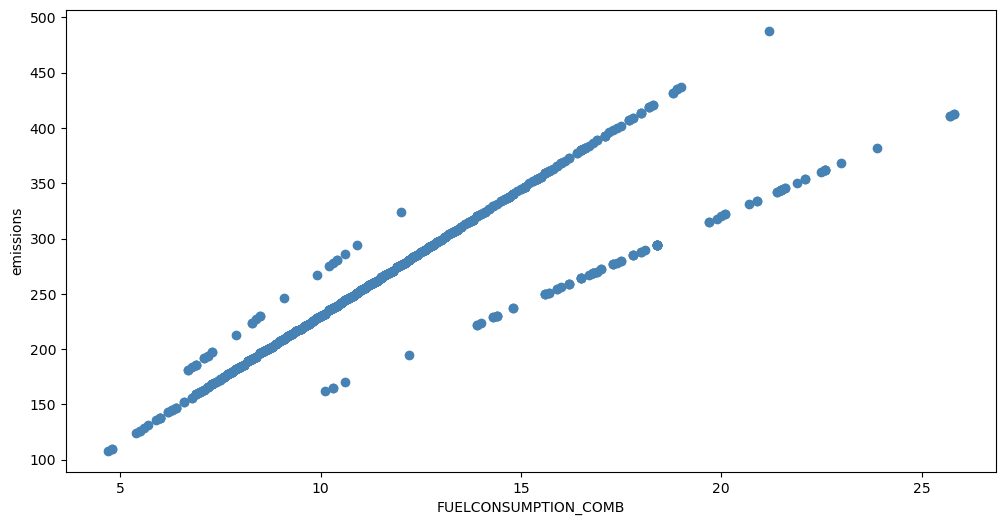

In [9]:
#  yakıt tüketimi ile CO2 emisyonları arasındaki ilişkiyi gösteren basit bir scatter plot çizimini

pylot.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color="steelblue")
pylot.xlabel("FUELCONSUMPTION_COMB")
pylot.ylabel("emissions")
pylot.show()

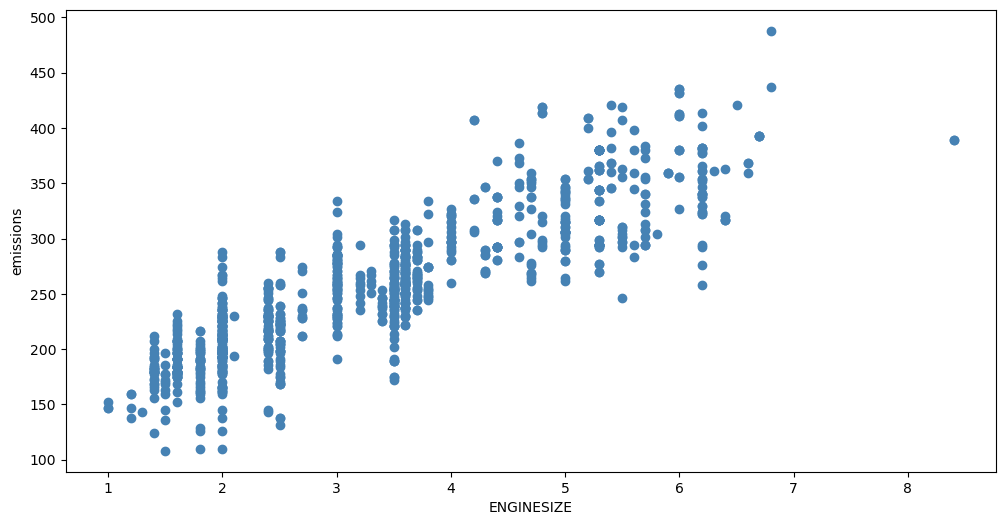

In [10]:
#araçların motor boyutu ile CO2 emisyonları arasındaki 
# ilişkiyi gösteren bir grafik oluşturur. 
# Genellikle, daha büyük motor boyutları genellikle daha yüksek CO2 emisyonları ile ilişkilidir, 
# bu nedenle bu tür bir grafik, motor boyutu ile 
# CO2 emisyonları arasındaki genel eğilimi görselleştirme
pylot.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="steelblue")
pylot.xlabel("ENGINESIZE")
pylot.ylabel("emissions")
pylot.show()

<Axes: xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

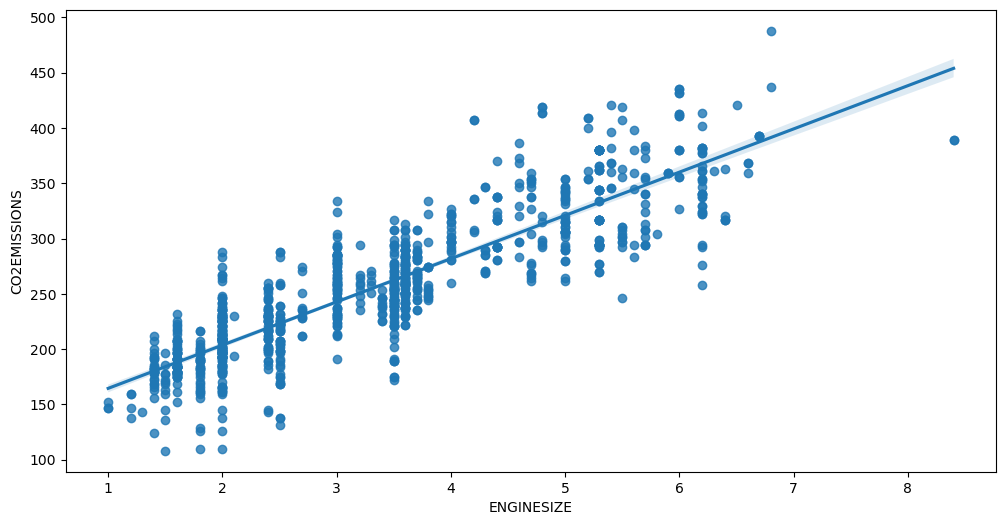

In [11]:
import seaborn as sns

sns.regplot(x=df['ENGINESIZE'], y=df['CO2EMISSIONS'])

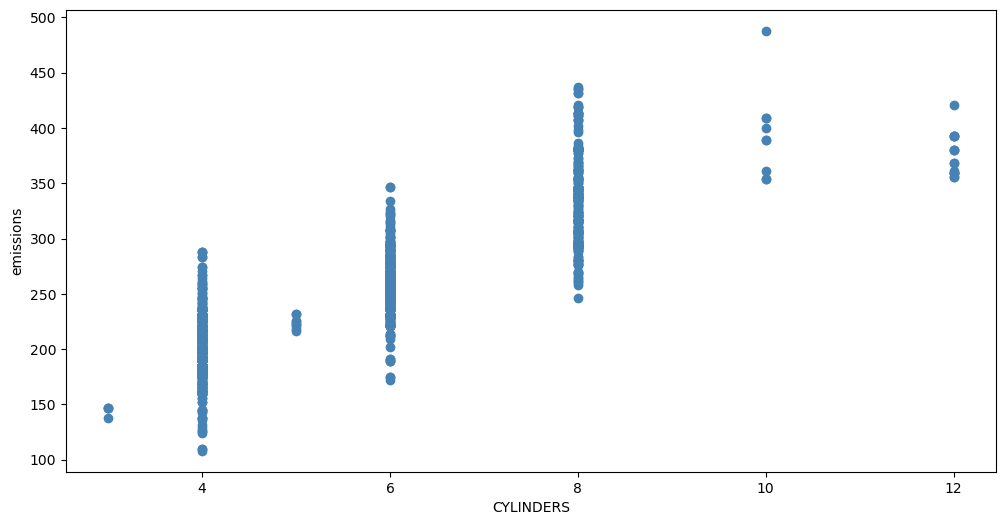

In [12]:
# Silindir sayısı arttıkça CO2 emisyonlarının nasıl değiştiğini görselleştirmek
pylot.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color="steelblue")
pylot.xlabel("CYLINDERS")
pylot.ylabel("emissions")
pylot.show()

In [13]:
# her bir rastgele sayının 0.8'den küçük olup olmadığını 
# kontrol eder. Sonuç, True veya False olan bir dizi olacaktır. Bu, rastgele seçilmiş gözlemlerin yüzde 80'ini True olarak ve geri kalan yüzde 20'sini False olarak işaretler.
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [14]:
msk

array([ True,  True,  True, ...,  True,  True,  True])

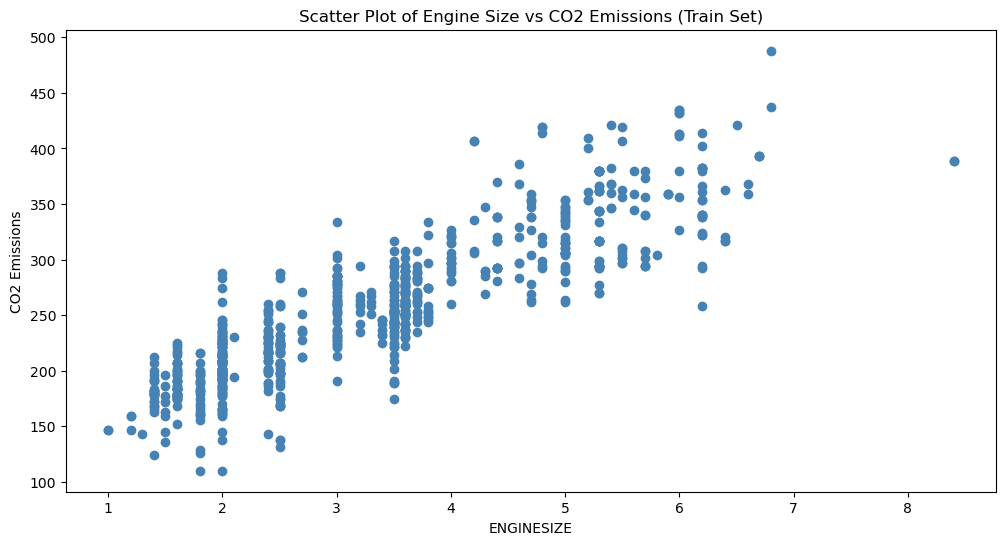

In [15]:
# Eğer train bir DataFrame ise ve 'ENGINESIZE' ve 'CO2EMISSIONS' sütunlarına sahipse:
pylot.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="steelblue")
pylot.xlabel("ENGINESIZE")
pylot.ylabel("CO2 Emissions")
pylot.title("Scatter Plot of Engine Size vs CO2 Emissions (Train Set)")
pylot.show()

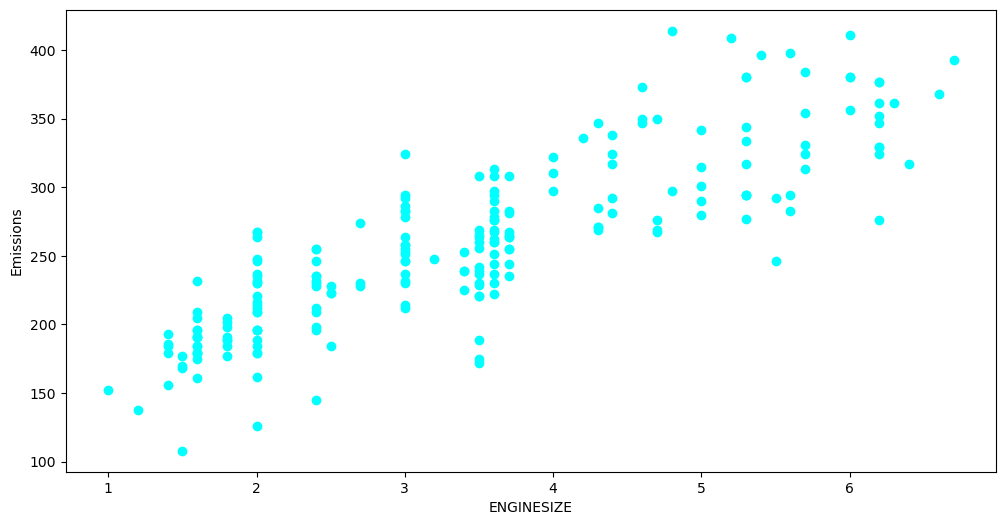

In [16]:
pylot.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color="cyan")
pylot.xlabel("ENGINESIZE")
pylot.ylabel("Emissions")
pylot.show()

In [17]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(train_x, train_y)

LinearRegression()

In [18]:
# eğitilmiş lineer regresyon modelinin katsayılarını ve kesme noktasını ekrana yazdırıldı. 
# Bu değerler, özellikler (bağımsız değişkenler) ile bağımlı değişken arasındaki ilişkiyi temsil eder. 
# Örneğin, bir motorun boyutu ile CO2 emisyonları arasındaki 
# ilişkiyi modelleyen bir regresyon modelinde, regr.coef_ değerleri motor boyutunun CO2 emisyonlarına olan etkisini gösterir 
# ve regr.intercept_ değeri regresyon doğrusunun yatay ekseni kestiği noktayı temsil eder.
print(regr.coef_)
print(regr.intercept_)

[[39.79459723]]
[123.27962539]


Text(0.5, 0, 'Emissions')

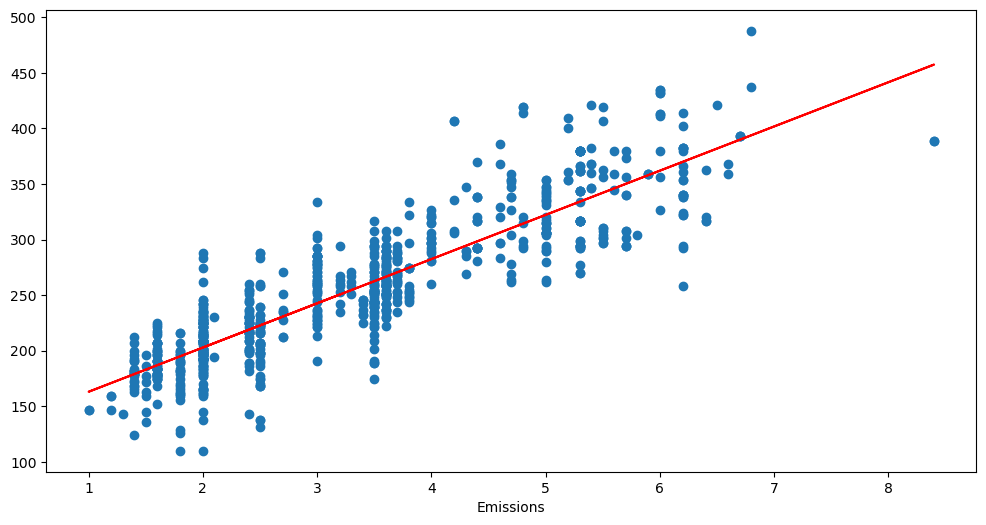

In [19]:
# train veri setindeki ENGINESIZE özellikleri ile
# CO2EMISSIONS hedef değişkeni arasındaki ilişkiyi
pylot.scatter(train.ENGINESIZE, train.CO2EMISSIONS)

#lineer regresyon modelinin çizdiği doğruyu (train_x'e göre-bağımsız değişken değeri) gösterir.
pylot.plot(train_x, regr.coef_[0][0]*train_x+regr.intercept_[0], '-r')
#regr.coef_[0][0] eğim (slope) ve regr.intercept_[0] y-kesit (intercept) değerlerini temsil eder.

pylot.xlabel("Enginesize")
pylot.xlabel("Emissions")

- Mean Absolute Error (MAE), Mean Squared Error (MSE) ve Root Mean Squared Error (RMSE) regresyon modellerinin performansını değerlendirmek için kullanılan üç yaygın metriktir.

MAE:
- MAE, modelin tahminlerinin gerçek değerlerden ne kadar sapma gösterdiğini ölçen bir metriktir.
- Her bir gözlem için gerçek değer ile tahmin arasındaki mutlak farkların ortalaması alınır.
- Daha küçük bir MAE, modelin daha iyi performans gösterdiğini gösterir.
MSE:
- MSE, gerçek değerler ile tahminler arasındaki farkların karesinin ortalamasını alır.
- Hata kareleri kullanıldığı için büyük sapmalar daha fazla ağırlık taşır ve bu nedenle daha büyük hatalar daha belirgin hale gelir.
RMSE:
- RMSE, MSE'nin karekökü alınarak elde edilir. Bu, hataların orijinal ölçü biriminde ifade edilmesini sağlar.
- Daha küçük bir RMSE, modelin daha iyi performans gösterdiğini gösterir.

Bu metrikler, regresyon modellerinin performansını ölçmek için kullanılır. RMSE, hataların orijinal ölçü biriminde ifade edilmesi açısından MSE'ye tercih edilebilir. Her üç metrik de modelin performansını değerlendirmek için kullanılabilir, ancak veri setine ve probleme bağlı olarak tercih edilebilecek farklı ölçütlerdir.


In [20]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

In [21]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 25.48
Residual sum of squares (MSE): 1100.60
R2-score: 0.72


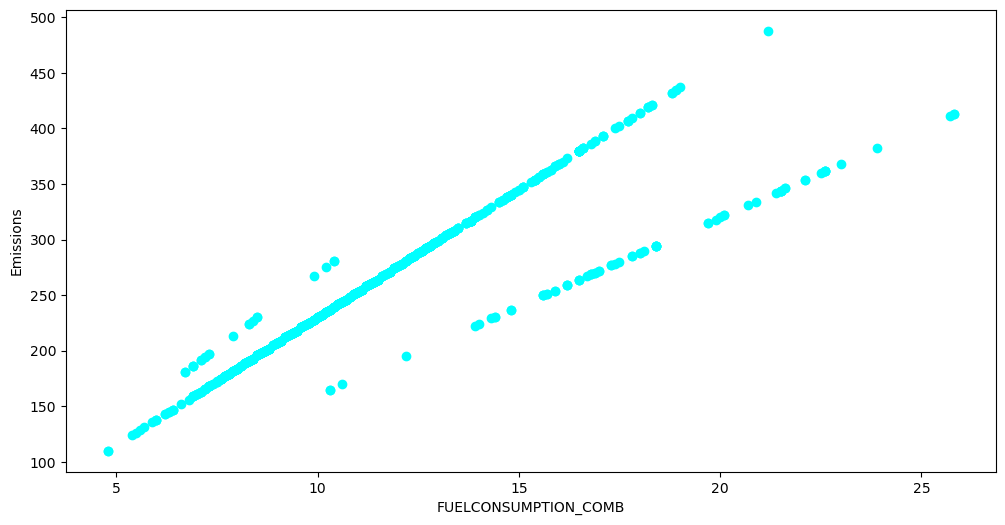

In [22]:
# Eğer train bir DataFrame ise ve 'FUELCONSUMPTION_COMB' ve 'CO2EMISSIONS' sütunlarına sahipse:
pylot.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS, color="cyan")
pylot.xlabel("FUELCONSUMPTION_COMB")
pylot.ylabel("Emissions")
pylot.show()

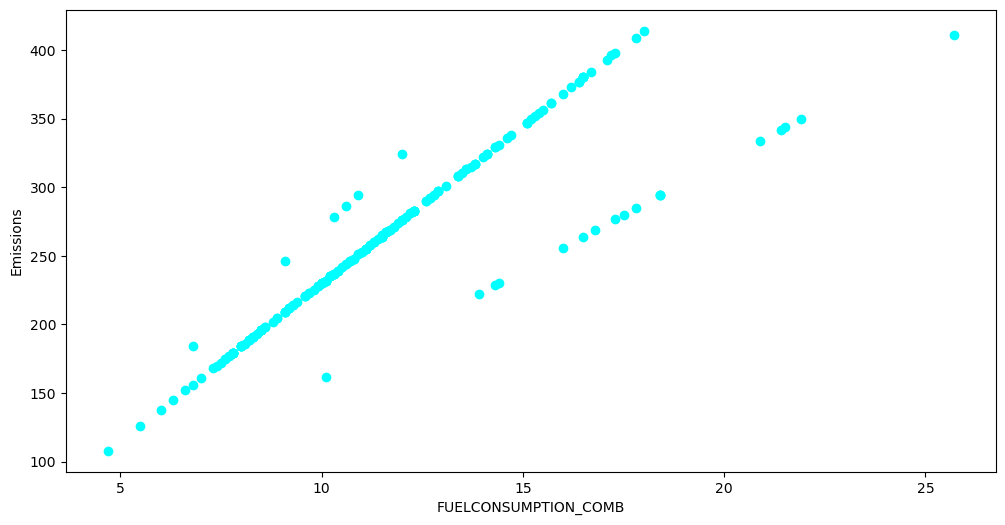

In [23]:
pylot.scatter(test.FUELCONSUMPTION_COMB, test.CO2EMISSIONS, color="cyan")
pylot.xlabel("FUELCONSUMPTION_COMB")
pylot.ylabel("Emissions")
pylot.show()

In [24]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(train_x, train_y)

LinearRegression()

In [25]:
print(regr.coef_)
print(regr.intercept_)

[[16.15882587]]
[68.74492906]


Simple Linear Regresyon Formula
y=mx+b
y: bağımlı değişken
x: bağımsız değişken
m: eğim
b: intercept

CO2EMISSIONS = regr.coef_*FUELCONSUMPTION_COMB+regr.intercept_

In [26]:
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

In [27]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 20.88
Residual sum of squares (MSE): 838.04
R2-score: 0.78


Multiple Linear Regresyon

y= b0 + b1*x1 + b2*x2 + ... + bm*xn

y: bağımlı değişken (CO2EMISSIONS)

x1, x2, ..., xn: bağımsız değişken(ENGINESIZE, CYLINDERS, FUELCONSUMPTION_COMB )

b0: intercept

b1, b2, ..., bn: katsayı (coeff)


y=150 
ilk satır için:
196-150=46 amacımız bu değeri düşürmek "resudual error"
Calculate MSE value for model accuracy


How to estimate multiple linear regression parameters?
    - How to estimate
        - Ordinary Least Squares:
            -Takes long time for large datasets (10K+row)
        
        - An optization algorithm
            - Gradient Descent

In [28]:
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [30]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [45]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

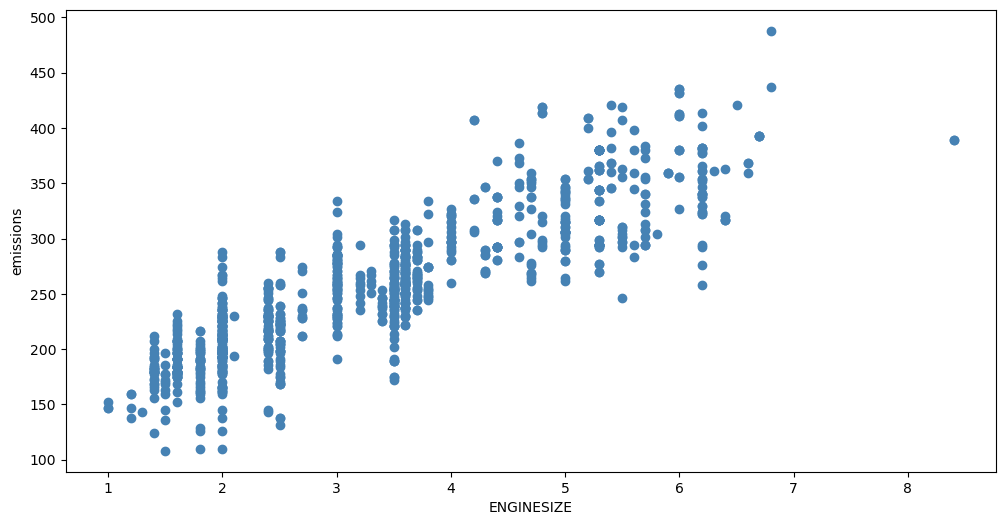

In [46]:
pylot.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="steelblue")
pylot.xlabel("ENGINESIZE")
pylot.ylabel("emissions")
pylot.show()

In [56]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [48]:
#linear_model
regr=linear_model.LinearRegression() #classın instance'sini oluşturuyoruz

x= np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y= np.asanyarray(train['CO2EMISSIONS'])

regr.fit(x, y)

LinearRegression()

In [49]:
print('Coeff:', regr.coef_)

Coeff: [10.01437315  7.86093823 10.01591629]


In [50]:
# Prediction

y_hat=regr.predict(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
x= np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y= np.asanyarray(test['CO2EMISSIONS'])

d:\Program\Miniconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [51]:
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y) ** 2))

print('Variance score: %2f' % regr.score(x, y)) # explained variance, best score is 1.0

Residual sum of squares (MSE): 630.10
Variance score: 0.835041


Çoklu regresyonda MSE (Mean Squared Error), modelin tahminlerinin gerçek değerlerden ne kadar sapma gösterdiğini ölçen bir performans metriğidir. Çoklu regresyonda MSE hesaplamak için genellikle şu adımları takip edersiniz:

1. Modelinizi eğitin ve tahminler yapın.
2. Gerçek değerlerle tahmin edilen değerler arasındaki farkları hesaplayın.
3. Bu farkların karesini alın.
4. Karesel hataları toplayın.
5. Toplamı göz sayısına (veri noktalarının sayısı) bölün.

Practice
Use a multiple linear regression with the same data , use FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY instead of FUELCONSUMPTION_COMB
Does it result with better accuracy

In [65]:
# FUELCONSUMPTION_COMB ve FUELCONSUMPTION_HWY kolonları alındı
x= np.asanyarray(train[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_HWY']])
y= np.asanyarray(train['CO2EMISSIONS'])

regr.fit(x, y) #model eğitildi

LinearRegression()

In [67]:
y_hat=regr.predict(test[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_HWY']])
x= np.asanyarray(test[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_HWY']])
y= np.asanyarray(test['CO2EMISSIONS'])

d:\Program\Miniconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [68]:
print("Mean Squared Error (MSE) : %.2f"
      % np.mean((y_hat - y) ** 2))

print('Variance score (R2): %.2f' % regr.score(x, y)) # explained variance, best score is 1.0

Mean Squared Error (MSE) : 592.91
Variance score (R2): 0.86


'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB' sonucu:
- Residual sum of squares (MSE): 630.10
- Variance score: 0.835041